# 2: Maps and Spherical Harmonic Transformations

In [1]:
import healpy as hp
import pylab as pl
import numpy as np

# Reproduce Planck's colormap
from matplotlib.colors import ListedColormap
colombi1_cmap = ListedColormap(np.loadtxt("https://raw.githubusercontent.com/zonca/paperplots/master/data/Planck_Parchment_RGB.txt")/255.)
colombi1_cmap.set_bad("gray") # color of missing pixels
colombi1_cmap.set_under("white") # color of background, necessary if you want to use
cmap = colombi1_cmap

%matplotlib inline

## HEALPix maps

One major data structure we work with are "maps". Maps come in different formats, shapes and sizes. A common and standardized format is defined in the [HEALPix framework](https://healpix.jpl.nasa.gov/), which not only defines a special pixelization of the sphere which we want to map out, but comes with useful tools and packages in many different programming languages and sets specific conventions for data structures.

Here we will use `healpy`, a python wrapper to the HEALPix package including functions for manipulating, transforming and visualizing HEALPix maps. HEALPix maps are defined as vectors of specific sizes, the number of pixels in a map (`npix`), which is determined by a single parameter called `nside`, which should be a power of 2 (to make computations efficient later). We can visualize this by making a plot of such a map in [Mollweide projection](https://en.wikipedia.org/wiki/Mollweide_projection), giving each pixel a specific color by creating a map of pixel numbers.

0.0 180.0 -180.0 180.0


Number of pixels in a map of nside=4 is 192


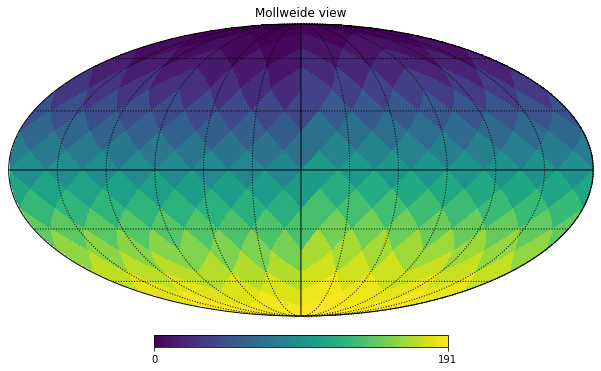

In [39]:
nside = 4 # for us this is a very low number for nside, but memory usage (and often computation time) will scale with nside**2
npix = hp.nside2npix(nside) # gives the number of pixels in a map of nside=8 (it's 12*nside**2)
print('Number of pixels in a map of nside=%d is %d'%(nside,npix))

pixel_number_map = np.arange(npix) # assigns each map pixel an integer number, starting at 0

hp.mollview(pixel_number_map) # plots this map in Mollweide projection
hp.graticule() # this adds grids of constant longitute and latitute

You can see that the pixel corresponding to the first entry in the map vector is at the North Pole (top) of the map and with increasing pixel number we run around in constant-latitute-rings until we reach the South Pole (bottom). You can also see the particular shape of HEALPix pixels, being close to diamond shape at low latitutes but become very distorted around the poles. These pixel shapes can sometimes become the source of massive headaches, but it enables the two important properties of HEALPix maps: equal area of each pixel and pixel centers being located on equal-latitute-rings. 

There are two useful functions to translate a HEALPix pixel number to physical coordinates of the pixel centers on the sphere (colatitute and longitute): `hp.ang2pix` and `hp.pix2ang`. The colatitude $\theta$ (`theta`) is $0^\circ$ at the North Pole, $90^\circ$ at the equator and $180^\circ$ at the South Pole while the longitude $\phi$ (`phi`) runs between $0^\circ$ and $360^\circ$ eastward (towards the left starting at $\phi=0$ in the center in the Mollweide projection).

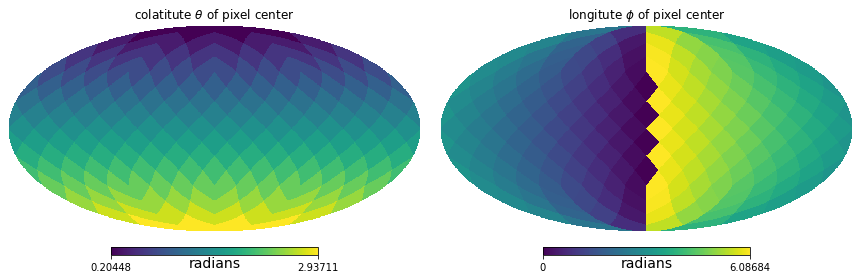

In [40]:
theta, phi = hp.pix2ang(nside, pixel_number_map) # computes that and phi for a given pixel index (or an array of pixel indices)

pl.figure(figsize=(12,4))
hp.mollview(theta, sub=(1,2,1), title=r'colatitute $\theta$ of pixel center', unit='radians')
hp.mollview(phi, sub=(1,2,2), title=r'longitute $\phi$ of pixel center', unit='radians')

## Reading and Writing Maps

The HEALPix package is relying on the (antiquated) [FITS file format](https://en.wikipedia.org/wiki/FITS) for reading and writing maps. Maps in FITS format can be easily stored on disk or read from disk with the two functions `hp.write_map` and `hp.read_map`, respectively. The following cell will read a map stored under `data/HFI_SkyMap_100_2048_R4.00_full.fits'`.

In [79]:
planck_map=hp.read_map('data/HFI_SkyMap_100_2048_R4.00_full.fits')
planck_map=hp.remove_dipole(planck_map,gal_cut=30) # necessary for visualizing this specific map, but details are irrelevant now

You have now read in a total intensity CMB map as measured by the [Planck space mission](https://en.wikipedia.org/wiki/Planck_(spacecraft%020) at 100 GHz. We can now plot it in various projections provided by the `healpy` package.

0.0 180.0 -180.0 180.0


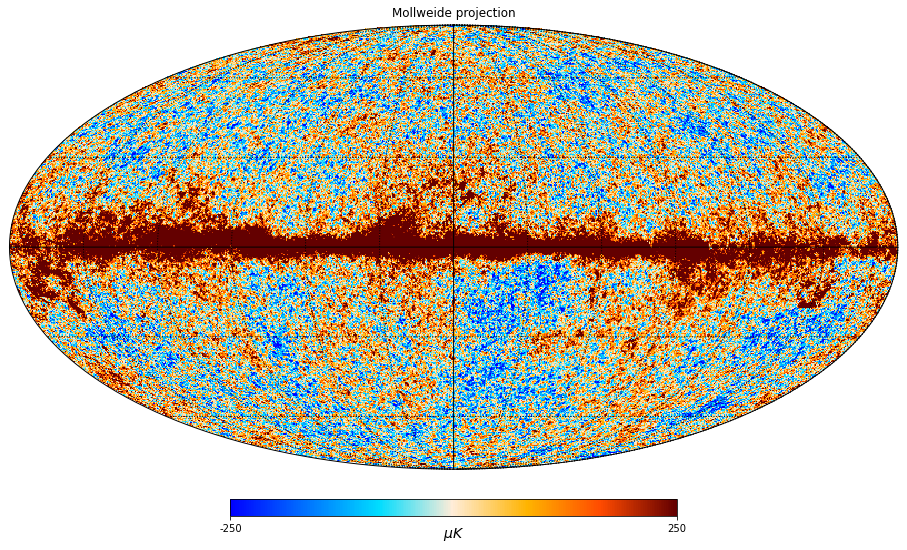

In [62]:
pl.figure(figsize=(16,10))

hp.mollview(
    planck_map*1e6, # the map, originally in units of K, transformed to \mu K, a unit we like more for some reason
    min=-250, # minimum value of the color scale range
    max=250, # maximum value of the color scale range
    cmap=cmap, # the specific colormap, the default is pl.cm.viridis, but others could be pl.cm.gray, pl.cm.RdBu or cmap defined in the first cell
    hold=True, # make sure to keep the figure size defined above
    unit='$\mu K$', # the unit of the color scale
    title='Mollweide projection'
)
hp.graticule()

0.0 180.0 -180.0 180.0


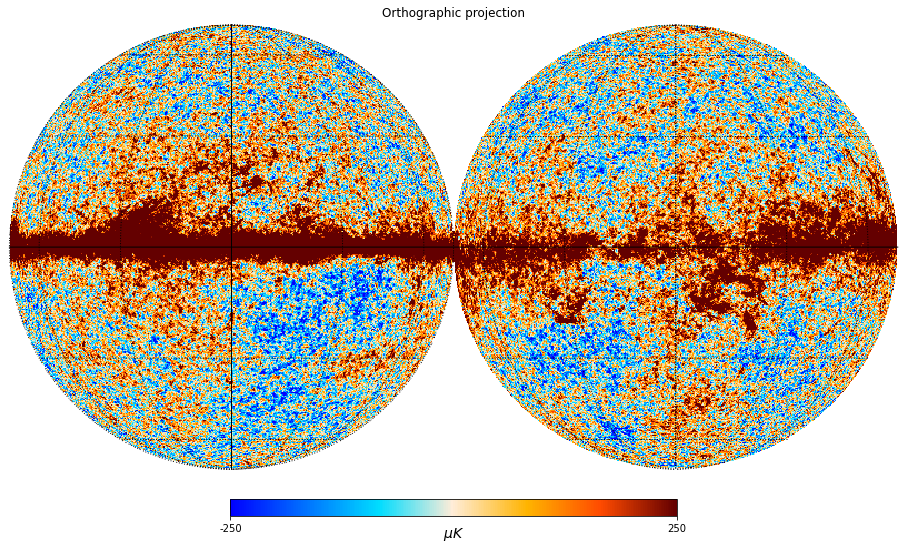

In [63]:
pl.figure(figsize=(16,10))

hp.orthview(
    planck_map*1e6,
    min=-250,
    max=250,
    cmap=cmap,
    hold=True,
    unit='$\mu K$',
    title='Orthographic projection'
)
hp.graticule()

109.30497835312461 180.0 -180.0 180.0


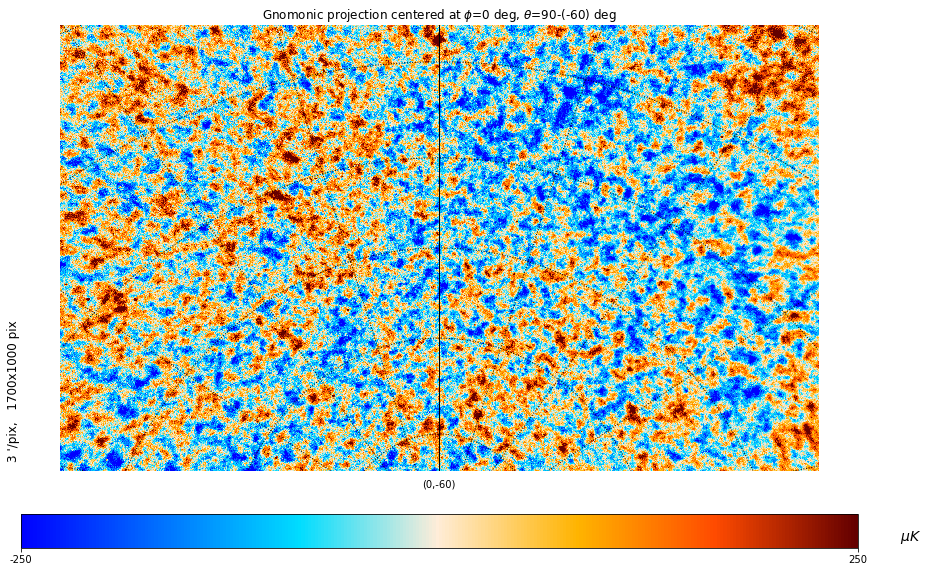

In [53]:
pl.figure(figsize=(30,10))

hp.gnomview(
    planck_map*1e6,
    rot=[0,-60], # gnomview displays a cut-out of the full map, we have to rotate the pixel we want this cut-out to be centered on to the coordinate (0,0) 
    xsize=1700, # dimension in the x direction
    ysize=1000, # dimension in the y direction
    reso=3, # the resolution in arcminutes, i.e. the x axis will have a range xsize*reso in arcminutes (1/60 degree)
    min=-250,
    max=250,
    cmap=cmap,
    hold=True,
    unit='$\mu K$',
    title=r'Gnomonic projection centered at $\phi$=0 deg, $\theta$=90-(-60) deg'
)
hp.graticule(local=False)

74.73437374314419 180.0 -180.0 180.0


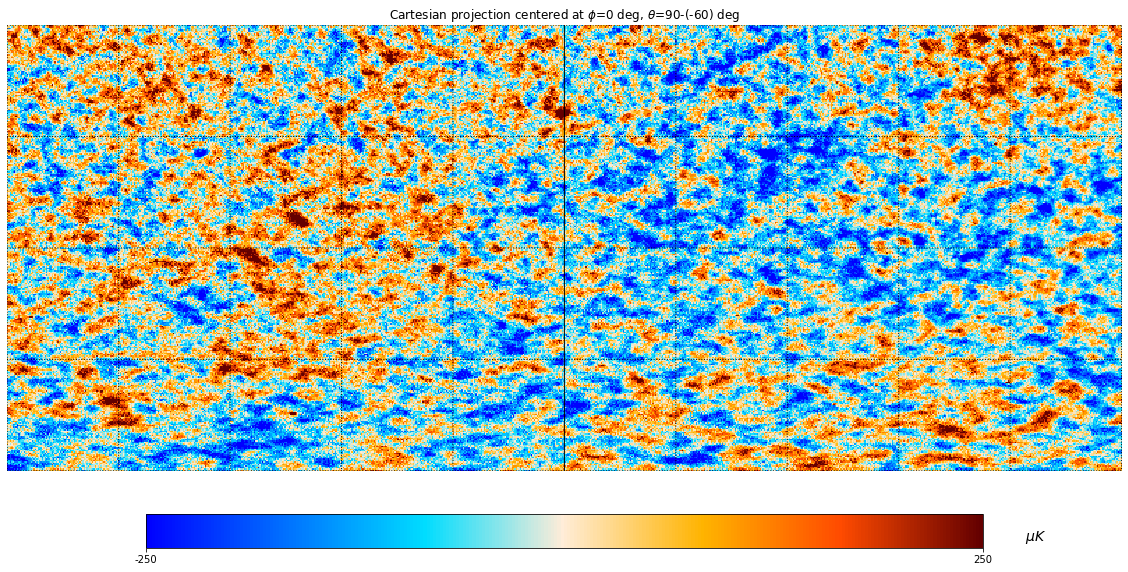

In [64]:
pl.figure(figsize=(30,10))

hp.cartview(
    planck_map*1e6,
    lonra=[-50,50], # the range in longitute
    latra=[-70,-30], # the range in latitute (not colatitute!!), i.e. lat=90-theta
    min=-250,
    max=250,
    cmap=cmap,
    hold=True,
    unit='$\mu K$',
    title=r'Cartesian projection centered at $\phi$=0 deg, $\theta$=90-(-60) deg'
)
hp.graticule(dpar=10,dmer=10,local=False) # make the grid below have a 10 degree spacing in each longitute and latitute

## Spherical Harmonic Functions

CMB maps are statistically isotropic and homogeneous. That means that the actually location of hot and cold, red and blue blobs in the maps above are random, statistically distributed. The actual physical information, the property that is determined by physical processes in the early and evolving Universe is the variance of these blobs depending on the angular scale one is concidering. Basis functions on the sphere allowing to expand any function defined on the sphere into modes of distinct angular scale are [spherical harmonic functions](https://en.wikipedia.org/wiki/Spherical_harmonics). Similar to a Fourier transform one can expand a bandlimited function, $f(x)$ defined on the sphere into a finite number of so called spherical harmonic coefficients
$$f(x)=\sum_{\ell m} a_{\ell m} Y_{\ell m}(x)$$
where $\ell$ and $m$ are indices The former determining the angular scale of the respective mode starting from $\ell=0$ and $m$ determining the "orientation" of the spherical harmonic, which can take integer values between $m=-\ell$ and $m=\ell$ (i.e. there are $2\ell+1$ modes per $\ell$).

In HEALPix the set of spherical harmonic coefficients is given as a complex vector (spherical harmonics are complex functions!). The size of this vector is determined by the parameter `lmax`, the maximum number the index $\ell$ can run to.

In [17]:
lmax=128

One can construct such a vector and set the $(\ell=1,m=0)$ mode to one, everything else to zero, in the following way.

In [18]:
alm=np.zeros(hp.Alm.getsize(lmax),dtype=complex)
alm[hp.Alm.getidx(lmax,l=1,m=0)]=1
print(alm)

[0.+0.j 1.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]


The plot below shows single spherical harmonic modes projected into Mollweide projection. You can see how $\ell$ determines the angular scale $\theta=180^\circ/\ell$ between hot and cold spots. You can also see how $m$ determines the orientation of the modes.

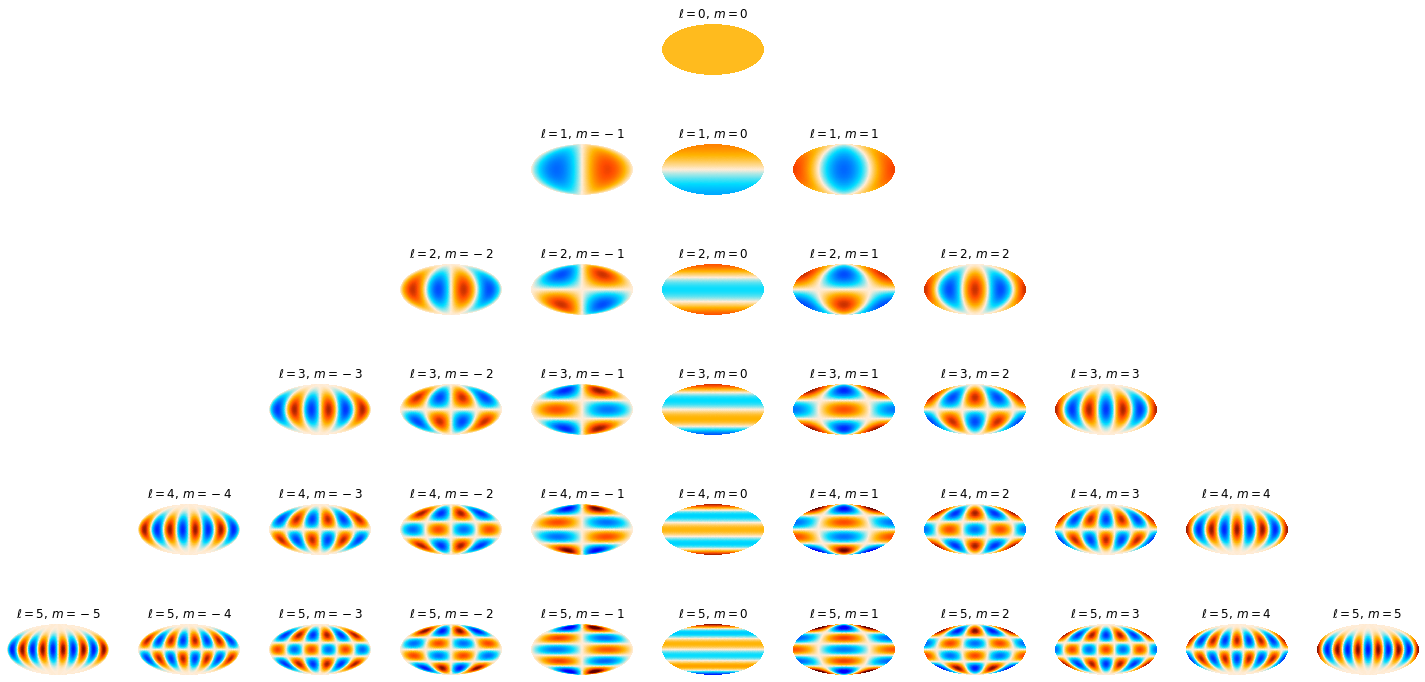

In [66]:
def plot_single_mode(l,m,sub=None):
    alm=np.zeros(hp.Alm.getsize(lmax),dtype=complex)
    if m<0:
        alm[hp.Alm.getidx(lmax,l,-m)]=(-1)**(-m)*1.j
    else:
        alm[hp.Alm.getidx(lmax,l,m)]=1
    hp.mollview(hp.alm2map(alm,64,verbose=False),min=-1,max=1,cmap=cmap,sub=sub,notext=True,cbar=False,title='$\ell=%d$, $m=%d$'%(l,m))
    
pl.figure(figsize=(20,10))

lmax_plot=5

for l in range(0,lmax_plot+1):
    for m in np.arange(-l,l+1):
        plot_single_mode(l,m,sub=(lmax_plot+1,2*lmax_plot+1,l*(2*(lmax_plot+1))+(lmax_plot+1-l)+m))

Looking again at our patch centered around $(\theta=-60^\circ,\phi=0^\circ)$ for the $\ell=100$ modes, we see that the $m=0$ mode is causing a stripy pattern along equal latitute lines, while for large $m$ the mode moves toward the equator of our map and outside of this specific patch.

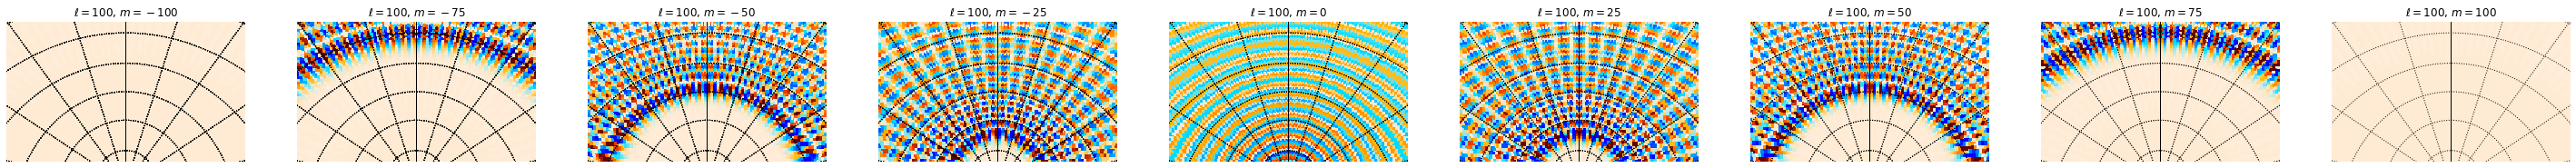

In [33]:
def plot_single_mode_gnomview(l,m,sub=None):
    alm=np.zeros(hp.Alm.getsize(lmax),dtype=complex)
    if m<0:
        alm[hp.Alm.getidx(lmax,l,-m)]=(-1)**(-m)*1.j
    else:
        alm[hp.Alm.getidx(lmax,l,m)]=1
    hp.gnomview(hp.alm2map(alm,64,verbose=False),rot=[0,-60],xsize=170,ysize=100,reso=30,min=-1,max=1,cmap=cmap,sub=sub,notext=True,cbar=False,title='$\ell=%d$, $m=%d$'%(l,m))
    hp.graticule(local=False,verbose=False)
    
pl.figure(figsize=(40,4))

l_plot=100
m_num=9

for i,m in enumerate(np.linspace(-l_plot,l_plot,m_num).astype(int)):
    plot_single_mode_gnomview(l_plot,m,sub=(1,len(np.linspace(-l_plot,l_plot,m_num)),1+i))

## Simulating a Map

In cosmology our central quantity of interest are power spectra, since these are the quantities we can compute from our underlying theory, the standard model of cosmology, or the Big Bang model. In particular nowadays the [$\Lambda$CDM model](https://en.wikipedia.org/wiki/Lambda-CDM_model) is well established, a model called after the two components we have absolutely no idea what they are: $\Lambda$, the cosmological constant or "dark energy" and CDM, cold dark matter. 

We can use `CAMB` to compute these power spectra of interest. `CAMB` implements a solver for coupled differential equations using a mix of General Relativity, the evolution of space-time dpending on the energy and matter content in the Universe, and thermodynamics. The input to each computation are cosmological parameter. [There are six basic ones](https://en.wikipedia.org/wiki/Lambda-CDM_model#Parameters): The baryon density `ombh2`, the dark matter density `omch2`, the scalar power spectrum amplitude `As`, the scalar spectral index `ns`, the reionization optical depth `tau` and the Hubble constant `H0`.

In [2]:
import camb

nside=256
lmax=3*nside-1

H0=67.4
ombh2=0.022383
omch2=0.12011
As=1e-10*np.exp(3.0448)
ns=0.96605
tau=0.0543

pars = camb.set_params(H0=H0, ombh2=ombh2, omch2=omch2, As=As, ns=ns, tau=tau)

pars.WantTensors=True
pars.set_for_lmax(lmax, lens_potential_accuracy=1)

data=camb.get_results(pars)
cells=data.get_cmb_power_spectra(pars, CMB_unit='muK', raw_cl=True)

The `cells` dictionary contains auto- and cross-power spectra between T, E and B-modes. We plot them below. Feel free to play around with the cosmological parameters above and see how the spectra change. 
<div class="alert alert-block alert-info">
<b>Exercise:</b> Add a seventh cosmological parameter, the tensor-to-scalar ratio `r`.
</div>

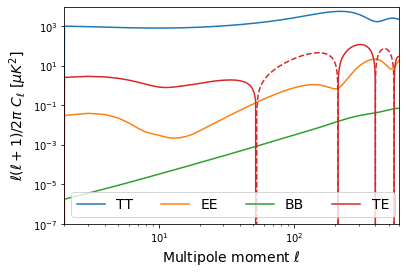

In [36]:
l=np.arange(lmax+1)

pl.plot(l,l*(l+1)/2/np.pi*cells['total'][:lmax+1,0],label='TT',c='C0')
pl.plot(l,l*(l+1)/2/np.pi*cells['total'][:lmax+1,1],label='EE',c='C1')
pl.plot(l,l*(l+1)/2/np.pi*cells['total'][:lmax+1,2],label='BB',c='C2')
pl.plot(l,l*(l+1)/2/np.pi*cells['total'][:lmax+1,3],label='TE',c='C3')
pl.plot(l,-l*(l+1)/2/np.pi*cells['total'][:lmax+1,3],c='C3',ls='dashed')

pl.yscale('log')
pl.xscale('log')
pl.xlabel('Multipole moment $\ell$',fontsize=14)
pl.ylabel('$\ell(\ell+1)/2\pi\ C_{\ell}$ $[\mu K^2]$',fontsize=14)
pl.xlim(2,600)
pl.ylim(1e-7,1e4)
pl.legend(fontsize=14,ncol=4)

These power spectra are connected to our spherical harmonic coefficients that we can use to simulate maps. These power spectra $C_\ell$ determine the variance of the spherical harmonic coefficients $a_{\ell m}$, i.e.
$$ C_\ell = \lim_{N\rightarrow\infty} \frac{1}{N} \sum_i^N a^{i\ \dagger}_{\ell m} a^i_{\ell m} $$
for many repetitions of experiments or draws of different realizations $i$. Pay attention here that in reality, other than in many other areas of Physics, there is no way we can perform repeated experiments: we have only this one Universe and - unless we can travel to parallel Universes - we will never get access to a second realization of our Universe. 

However we can still measure power spectra by noting the fact that they do not depend on $m$, reflecting statistical isotropy and homogeneity of our Universe. We can perform $2\ell+1$ distinct measurements for each $\ell$-mode, there are $2\ell+1$ distinct $a_{\ell m}$ coefficents per given $\ell$.

In other word, the $a_{\ell m}$ are Gaussian distributed, with probability distribution function
$$ P(a_{\ell m}|C_\ell) = \frac{1}{\sqrt{2\pi C_\ell}} \exp\left(-\frac{1}{2} a^\dagger_{\ell m} C^{-1}_\ell a_{\ell m}\right), $$
where
$$ C_\ell = \begin{pmatrix}
C^{TT}_\ell & C^{TE}_\ell & 0\\
C^{TE}_\ell & C^{EE}_\ell & 0\\
0 & 0 & C^{BB}_\ell
\end{pmatrix}
~~~{\rm and}~~~
a_{\ell m} =\begin{pmatrix}
a^T_{\ell m}\\
a^E_{\ell m}\\
a^B_{\ell m}
\end{pmatrix}.
$$
Our Universe is one draw from this distribution function. We will now make a simulated Universe by drawing from this distribution.

In [92]:
alm=np.random.normal(0.0,1.0,(3,hp.Alm.getsize(lmax),2)) # Compute Gaussian distributed random numbers with unit variance
alm=1./np.sqrt(2.)*(alm[:,:,0]+1.j*alm[:,:,1]) # Make a complex array of size (3,hp.Alm.getsize(lmax))

print(alm)
print(np.shape(alm))

[[ 0.09579589-0.20471611j -0.34580099+0.63372948j  0.23188684-0.41716312j
  ...  0.0445133 -0.36895257j -0.81584582+0.10357238j
   1.31902929-1.63040007j]
 [ 1.22685931-0.36804358j  0.84582586+0.72260946j  0.60650637-0.8321627j
  ...  0.90532124-0.31299145j -0.57113309+0.52547337j
   0.20486026+0.81236641j]
 [-0.99119527+0.5414145j  -0.17164452-1.00208786j -0.12674364-0.61930637j
  ...  0.07215386-1.07033585j -1.00375455-0.46613417j
   0.28519029-0.59118681j]]
(3, 295296)


Text(0.5, 1.0, 'normalized B modes')

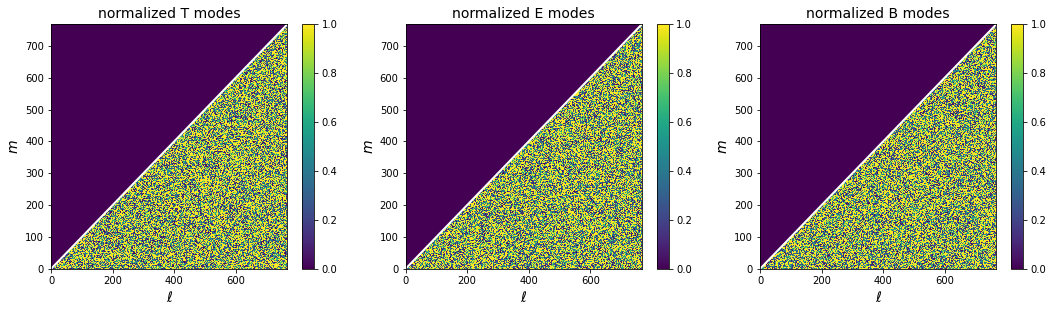

In [93]:
l,m=hp.Alm.getlm(lmax,np.arange(len(alm[0,:])))

alm_cube=np.zeros((3,lmax+1,lmax+1),dtype=complex)
alm_cube[:,l,m]=alm

pl.figure(figsize=(18,4.5))

ax=pl.subplot(1,3,1)
pcm=ax.pcolormesh(np.abs(alm_cube[0]).T**2,vmin=0,vmax=1);ax.plot([0,lmax+1],[0,lmax+1],c='w',lw=2)
pl.colorbar(pcm,ax=ax)

ax.set_xlabel('$\ell$',fontsize=14)
ax.set_ylabel('$m$',fontsize=14)
ax.set_title('normalized T modes',fontsize=14)


ax=pl.subplot(1,3,2)
pcm=ax.pcolormesh(np.abs(alm_cube[1]).T**2,vmin=0,vmax=1);ax.plot([0,lmax+1],[0,lmax+1],c='w',lw=2)
pl.colorbar(pcm,ax=ax)

ax.set_xlabel('$\ell$',fontsize=14)
ax.set_ylabel('$m$',fontsize=14)
ax.set_title('normalized E modes',fontsize=14)


ax=pl.subplot(1,3,3)
pcm=ax.pcolormesh(np.abs(alm_cube[2]).T**2,vmin=0,vmax=1);ax.plot([0,lmax+1],[0,lmax+1],c='w',lw=2)
pl.colorbar(pcm,ax=ax)

ax.set_xlabel('$\ell$',fontsize=14)
ax.set_ylabel('$m$',fontsize=14)
ax.set_title('normalized B modes',fontsize=14)

In [63]:
Cl=np.zeros((lmax+1,3,3))

Cl[:,0,0]=cells['total'][:lmax+1,0]
Cl[:,0,1]=Cl[:,1,0]=cells['total'][:lmax+1,3]
Cl[:,1,1]=cells['total'][:lmax+1,1]
Cl[:,2,2]=cells['total'][:lmax+1,2]

rootCl=np.zeros_like(Cl)
rootCl[2:]=np.linalg.cholesky(Cl[2:])

In [80]:
alm=np.einsum('lij,jl->il',rootCl[l,:,:],alm)
alm=np.ascontiguousarray(alm)

Text(0.5, 1.0, 'B modes')

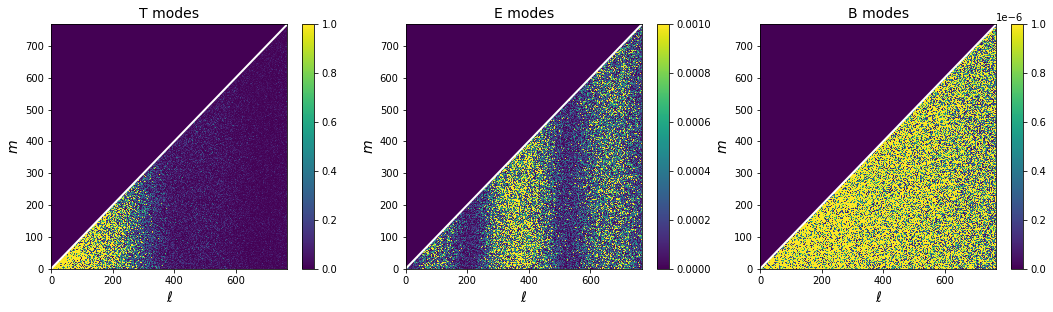

In [74]:
l,m=hp.Alm.getlm(lmax,np.arange(len(alm[0,:])))

alm_cube=np.zeros((3,lmax+1,lmax+1),dtype=complex)
alm_cube[:,l,m]=alm

pl.figure(figsize=(18,4.5))

ax=pl.subplot(1,3,1)
pcm=ax.pcolormesh(np.abs(alm_cube[0]).T**2,vmin=0,vmax=1);ax.plot([0,lmax+1],[0,lmax+1],c='w',lw=2)
pl.colorbar(pcm,ax=ax)

ax.set_xlabel('$\ell$',fontsize=14)
ax.set_ylabel('$m$',fontsize=14)
ax.set_title('T modes',fontsize=14)


ax=pl.subplot(1,3,2)
pcm=ax.pcolormesh(np.abs(alm_cube[1]).T**2,vmin=0,vmax=.001);ax.plot([0,lmax+1],[0,lmax+1],c='w',lw=2)
pl.colorbar(pcm,ax=ax)

ax.set_xlabel('$\ell$',fontsize=14)
ax.set_ylabel('$m$',fontsize=14)
ax.set_title('E modes',fontsize=14)


ax=pl.subplot(1,3,3)
pcm=ax.pcolormesh(np.abs(alm_cube[2]).T**2,vmin=0,vmax=.000001);ax.plot([0,lmax+1],[0,lmax+1],c='w',lw=2)
pl.colorbar(pcm,ax=ax)

ax.set_xlabel('$\ell$',fontsize=14)
ax.set_ylabel('$m$',fontsize=14)
ax.set_title('B modes',fontsize=14)

In [82]:
sim_map=hp.alm2map(alm,nside)

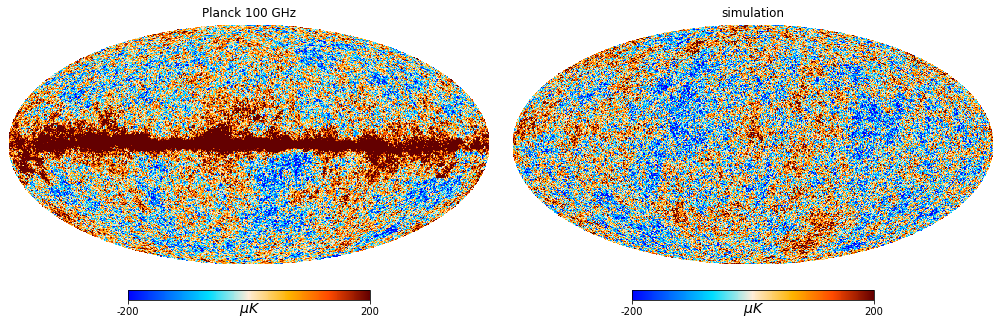

In [84]:
pl.figure(figsize=(14,7))

hp.mollview(
    hp.ud_grade(planck_map*1e6,nside),
    min=-200,
    max=200,
    sub=(1,2,1),
    cmap=cmap,
    unit='$\mu K$',
    title='Planck 100 GHz'
)

hp.mollview(
    sim_map[0],
    min=-200,
    max=200,
    sub=(1,2,2),
    cmap=cmap,
    unit='$\mu K$',
    title='simulation'
)

In [85]:
sim_map=hp.synfast(cells['total'].T,nside,new=True)

In [86]:
del sim_map

sim_maps=np.zeros((5,3,hp.nside2npix(nside)))

for i in range(len(sim_maps)):
    sim_maps[i]=hp.synfast(cells['total'].T,nside,new=True)

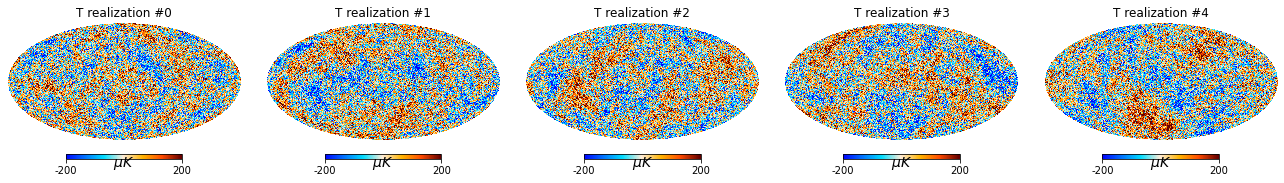

In [95]:
pl.figure(figsize=(18,4))

for i in range(5):
    hp.mollview(
        sim_maps[i,0],
        min=-200,
        max=200,
        sub=(1,5,1+i),
        cmap=cmap,
        unit='$\mu K$',
        title='T realization #%d'%i
    )

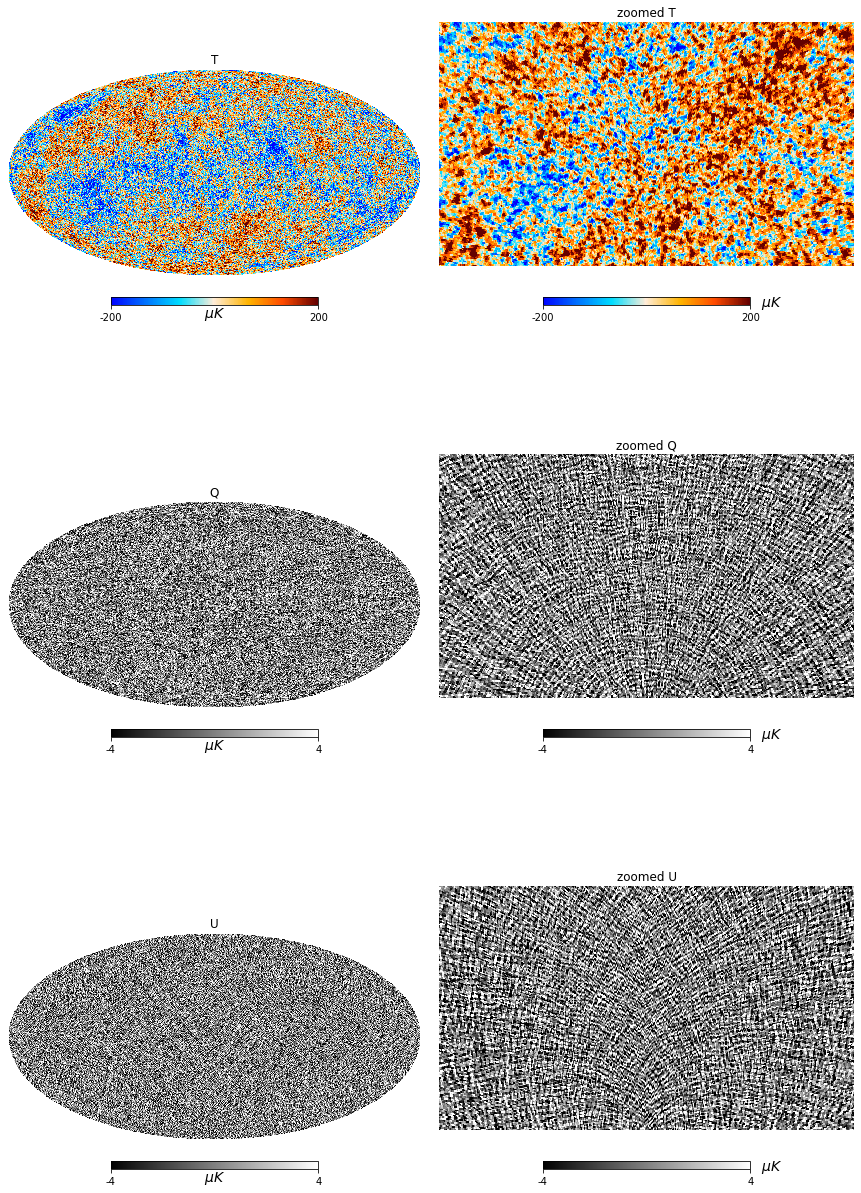

In [97]:
pl.figure(figsize=(12,18))

realization=1

hp.mollview(sim_maps[realization,0],min=-200,max=200,sub=(3,2,1),cmap=cmap,  unit='$\mu K$',title='T'); 
hp.gnomview(sim_maps[realization,0],min=-200,max=200,sub=(3,2,2),cmap=cmap,  unit='$\mu K$',title='zoomed T',notext=True,rot=[0,-60],xsize=1700,ysize=1000,reso=3);
hp.mollview(sim_maps[realization,1],min=-4  ,max=4  ,sub=(3,2,3),cmap='gray',unit='$\mu K$',title='Q');
hp.gnomview(sim_maps[realization,1],min=-4  ,max=4  ,sub=(3,2,4),cmap='gray',unit='$\mu K$',title='zoomed Q',notext=True,rot=[0,-60],xsize=1700,ysize=1000,reso=3);
hp.mollview(sim_maps[realization,2],min=-4  ,max=4  ,sub=(3,2,5),cmap='gray',unit='$\mu K$',title='U');
hp.gnomview(sim_maps[realization,2],min=-4  ,max=4  ,sub=(3,2,6),cmap='gray',unit='$\mu K$',title='zoomed U',notext=True,rot=[0,-60],xsize=1700,ysize=1000,reso=3);